# HOMEWORK 12

In this homework you are going to inspect the GTSDB (German Traffic Sign Detection Benchmark) dataset. The dataset contains images of various classes of traffic signs used in Germany (and the whole EU). The objective of this homework is to go through the steps described below and to implement the necessary code.

At the end, as usual, there will be a couple of questions for you to answer. In addition, the last section of this homework is optional and, if you chose to do it, you'll earn extra point :-)

In [1]:
import os
import cv2
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

### Step 0

Go to the GTSRB dataset official site ([link](https://benchmark.ini.rub.de/gtsrb_dataset.html)) to learn more about the dataset.

### Step 1

Download the dataset ([link](https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign)) and unzip it.

### Step 2

For this homework, you will be working with the training set. Check out the `Train.csv`, open it and see what it contains. Load the dataset and plot random samples.

In [8]:
# Load the training labels
root = "../data/GTSRB"  # Path to the dataset location,
data = pd.read_csv(os.path.join(root, 'Train.csv'))
print(data.tail(10))

       Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId  \
39199     44      46       6       6      39      41       42   
39200     44      46       5       5      39      41       42   
39201     47      50       5       6      42      45       42   
39202     49      50       6       5      44      45       42   
39203     51      53       6       5      46      48       42   
39204     52      56       5       6      47      51       42   
39205     56      58       5       5      51      53       42   
39206     58      62       5       6      53      57       42   
39207     63      69       5       7      58      63       42   
39208     68      69       7       6      62      63       42   

                                 Path  
39199  Train/42/00042_00007_00020.png  
39200  Train/42/00042_00007_00021.png  
39201  Train/42/00042_00007_00022.png  
39202  Train/42/00042_00007_00023.png  
39203  Train/42/00042_00007_00024.png  
39204  Train/42/00042_00007_00025.png  
3920

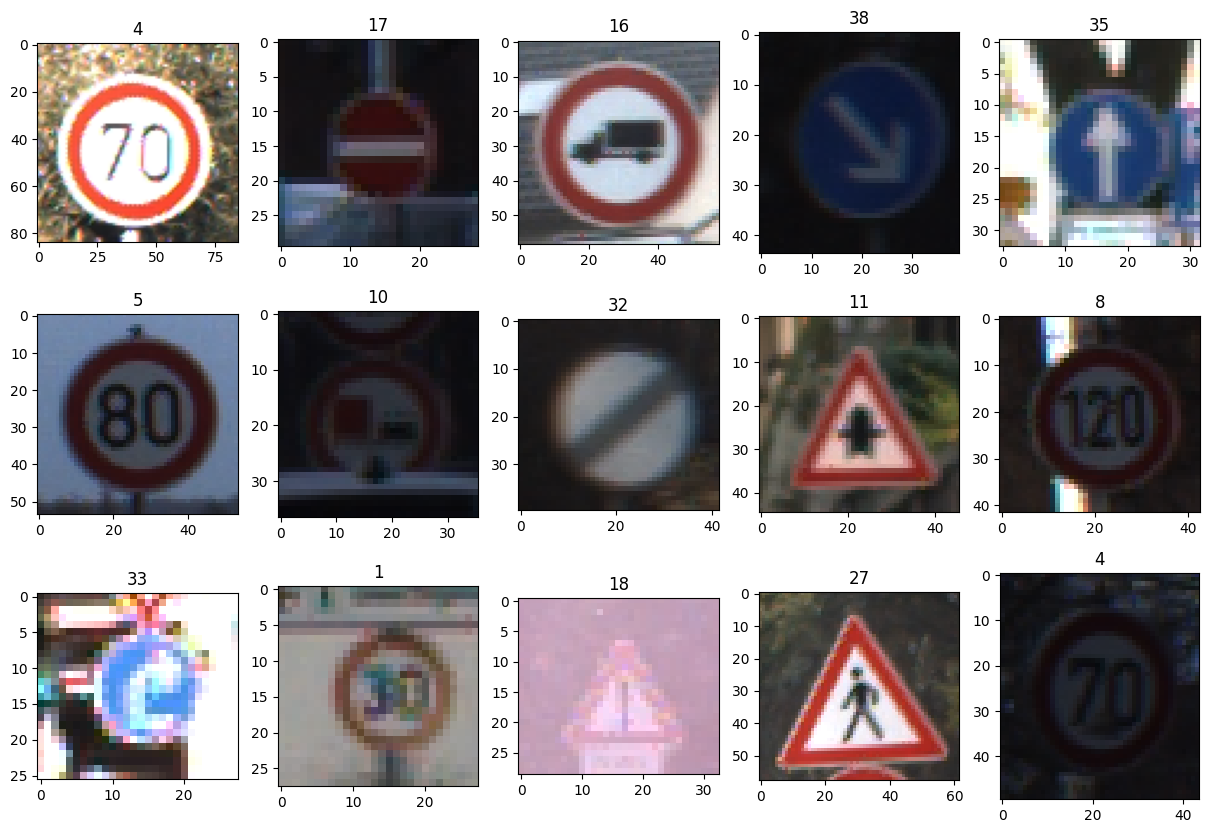

In [9]:

# Number of training samples (amount of samples in data)
num_samples = len(data)

# Show random data samples
for ii in range(15):
    # Get random index
    idx = np.random.randint(0, num_samples)
    # Load image
    img = cv2.imread(os.path.join(root, data.iloc[idx]['Path']))
    # Convert image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Show image
    plt.subplot(3,5,ii+1), plt.imshow(img), plt.title(data.iloc[idx]['ClassId'])

### Step 3

Inspect the dataset by computing and plotting the per-class histogram.

In [14]:
ids = data['ClassId']


Compute the per class histogram. You can use any approach you want (e.g. `numpy`). It's also worth looking at the `Counter` function from the `collections` module ([link](https://docs.python.org/3/library/collections.html#collections.Counter)) ;-)

(Text(0.5, 0, 'Traffic Sign ID'), Text(0, 0.5, 'Counts'))

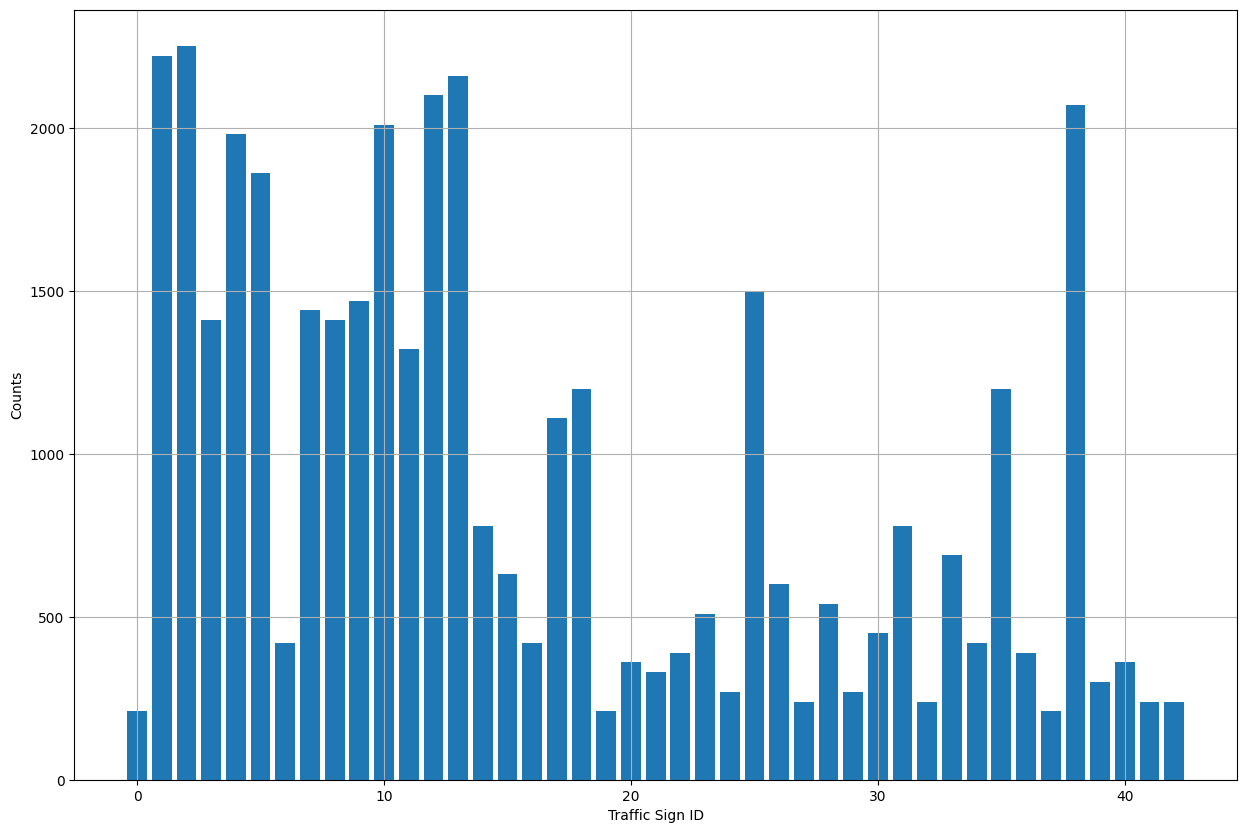

In [15]:
from collections import Counter
hist = Counter(ids)

plt.bar(hist.keys(), hist.values()), plt.grid(True)
plt.xlabel('Traffic Sign ID'), plt.ylabel('Counts')

### Questions

Please answer the following questions:
* Do you consider the dataset to be balanced? If so, why? If not, why?


* I think this data set is not balanced
* Some classes have few examples relative to other classes which have many examples
* 


* Are there any classes that are (significantly) over-represented or under-represeneted?
* Yes, there are classes that have more than 2,000 samples, while some classes have approximately 200.

### Optional

Perform a further analysis on the dataset and draw some conclusion from it.

Hint 1: Unlike MNIST or CIFAR10, this dataset contains images with various spatial resolutions. Is there anything we can tell about the resolution distribution?
Hint 2: What about the brightness distribution? Are there classes there are significantly more bright than others?